In [1]:
# import libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# Image size and loading datasets
IMAGE_SIZE = (250, 250, 3)

In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inceptionresnet = InceptionResNetV2(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
for layer in inceptionresnet.layers:
    layer.trainable = False

In [5]:
# useful for getting number of output classes
folders = glob(r"D:\Documents\AIUB\Thesis\BM20\train\*")

In [6]:
# our layers - you can add more if you want
x = Flatten()(inceptionresnet.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inceptionresnet.input, outputs=prediction)

In [8]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 124, 124, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 124, 124, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [9]:
import tensorflow as tf

METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc')
]

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=METRICS
)

In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(r"D:\Documents\AIUB\Thesis\BM20\train",
                                                 target_size = (250, 250),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 27405 images belonging to 21 classes.


In [13]:
test_set = test_datagen.flow_from_directory(r"D:\Documents\AIUB\Thesis\BM20\val",
                                            target_size = (250, 250),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 6863 images belonging to 21 classes.


In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\user\AppData\Local\Temp\ipykernel_11984\3314549357.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
857/857 [==============================] - 9178s 11s/step - loss: 6.4030 - accuracy: 0.9494 - precision: 0.4680 - recall: 0.4519 - auc: 0.7928 - val_loss: 7.2100 - val_accuracy: 0.9560 - val_precision: 0.5381 - val_recall: 0.5314 - val_auc: 0.8086
Epoch 2/5
857/857 [==============================] - 9558s 11s/step - loss: 6.2954 - accuracy: 0.9567 - precision: 0.5463 - recall: 0.5388 - auc: 0.8166 - val_loss: 7.0629 - val_accuracy: 0.9591 - val_precision: 0.5712 - val_recall: 0.5651 - val_auc: 0.8181
Epoch 3/5
857/857 [==============================] - 9486s 11s/step - loss: 5.9420 - accuracy: 0.9603 - precision: 0.5842 - recall: 0.5784 - auc: 0.8322 - val_loss: 6.2843 - val_accuracy: 0.9622 - val_precision: 0.6036 - val_recall: 0.5977 - val_auc: 0.8378
Epoch 4/5
857/857 [==============================] - 10224s 12s/step - loss: 5.7551 - accuracy: 0.9626 - precision: 0.6080 - recall: 0.6025 - auc: 0.8422 - val_loss: 7.1243 - val_accuracy: 0.9591 - val_precision: 0.5712 - val_

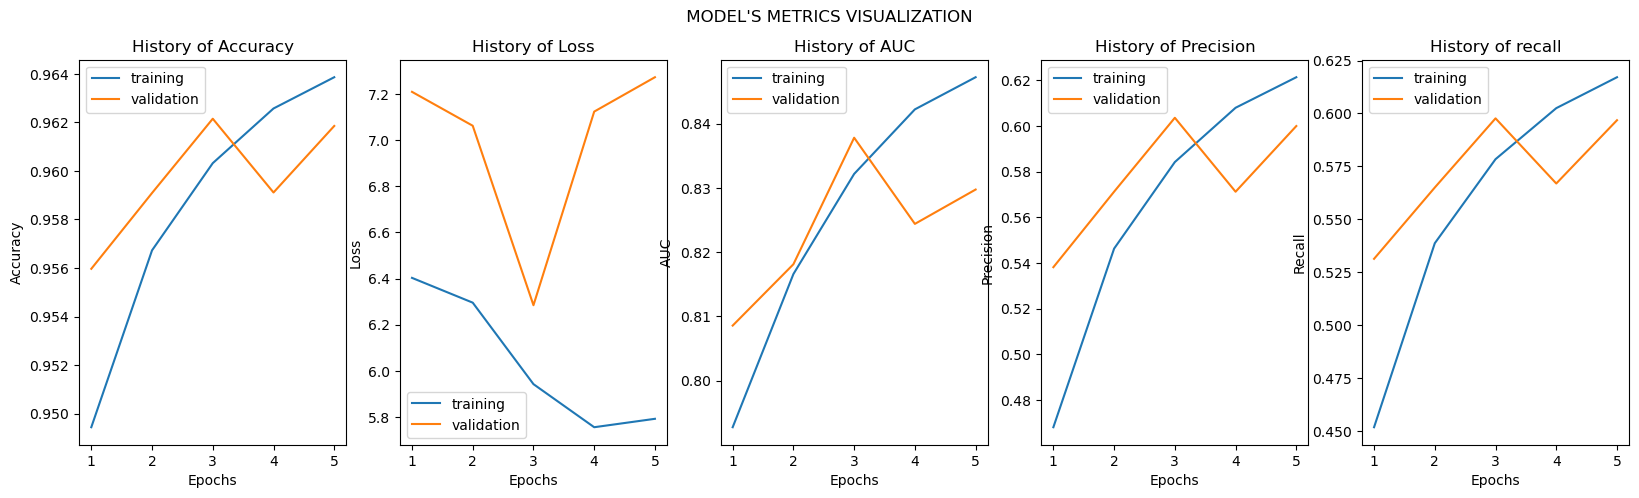

In [15]:
#%% PLOTTING RESULTS (Train vs Validation FOLDER 1)

def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc,precision,val_precision,recall, val_recall):
    
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])

    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    
    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['training', 'validation'])

    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend(['training', 'validation'])
    
    ax5.plot(range(1, len(recall) + 1), recall)
    ax5.plot(range(1, len(val_recall) + 1), val_recall)
    ax5.set_title('History of recall')
    ax5.set_xlabel('Epochs')
    ax5.set_ylabel('Recall')
    ax5.legend(['training', 'validation'])

plt.show()
    

Train_Val_Plot(r.history['accuracy'],r.history['val_accuracy'],
               r.history['loss'],r.history['val_loss'],
               r.history['auc'],r.history['val_auc'],
               r.history['precision'],r.history['val_precision'],
               r.history['recall'],r.history['val_recall']
              )